In [1]:
# パッケージインストールと変数宣言とファイルの読み込み
from scipy import fftpack
from scipy.fftpack import fftfreq
import numpy as np
import matplotlib.pyplot as plt

N = 11
# hw = [0,0.00785,0.04015,0.10325,0.17066,0.20,0.17066,0.10325,0.04015,0.00785,0]

file = open("forward2.txt")
file_lines = file.readlines()
sensor = np.array([float(line.replace("\n", "").split(",")[0]) for line in file_lines])
print(sensor)

# データの個数をNの倍数にするために、最後のm個のデータを削除するプロセス
m = len(sensor) % N
print('', m)
for i in range(0, m, 1):
    sensor = np.delete(sensor, len(sensor)-1)
    
print('len(sensor)%N=', len(sensor)%N)

[21. 21. 21. ... 47. 47. 45.]
 5
len(sensor)%N= 0


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


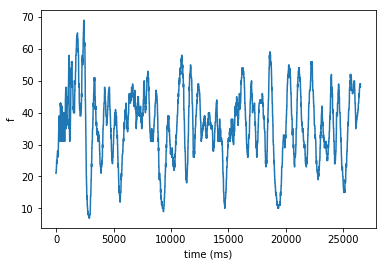

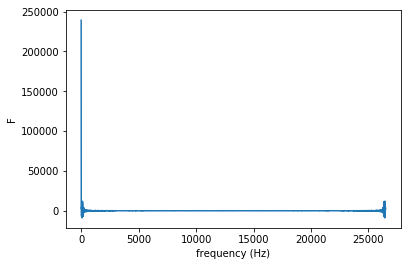

In [2]:
# FFT参考: https://org-technology.com/posts/smoother.html
#       http://aidiary.hatenablog.com/entry/20110618/1308367728
# サンプリング周波数はこの場合、4msごとにデータを取っているので1/0.004=250Hz

# 時系列のサンプルデータ作成
fs = 250                        # サンプリング周波数
t = range(0, len(sensor)*4, 4)

N = len(sensor)                         # データ数

F = fftpack.fft(sensor)
freq = fftpack.fftfreq(N, 1/fs)

# プロット
# 時系列データ
plt.figure(1)
plt.plot(t, f)
plt.xlabel("time (ms)")
plt.ylabel("f")

# 離散フーリエ変換の結果
plt.figure(2)
plt.plot(t, F)
# plt.xlim(0, 1)
plt.xlabel("frequency (Hz)")
plt.ylabel("F")

plt.show()

In [ ]:
# カットオフ周波数[Hz]
fs = 1000
F2 = np.copy(F)
F2[(freq > fs)] = 0
F2[(freq < 0)] = 0

# 逆 FFT 処理
f2 = np.real(fftpack.ifft(F2) * N)

# プロット
# 時系列データ
plt.figure(1)
plt.plot(t, F2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("F2")

# 逆離散フーリエ変換の結果
plt.figure(2)
plt.plot(t, f2)
plt.xlabel("time (ms)")
plt.ylabel("f2")